In [101]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

## attribute

In [3]:
attr = pd.read_csv('../Data/attr.csv')

In [4]:
attr.head()

,session_id,attribute,attribute_value,user_id_hash
0,2201961907282901522,0,1.0,9943447915df3a45fd6720a026af905b6da6b56a37701b...
1,2201961907282901522,1,1.0,9943447915df3a45fd6720a026af905b6da6b56a37701b...
2,2201961907282901522,3,0.0,9943447915df3a45fd6720a026af905b6da6b56a37701b...
3,2201961907282901522,4,0.0,9943447915df3a45fd6720a026af905b6da6b56a37701b...
4,2201961907282901522,6,29.0,9943447915df3a45fd6720a026af905b6da6b56a37701b...


In [5]:
attr.head(100)

,session_id,attribute,attribute_value,user_id_hash
0,2201961907282901522,0,1.00,9943447915df3a45fd6720a026af905b6da6b56a37701b...
1,2201961907282901522,1,1.00,9943447915df3a45fd6720a026af905b6da6b56a37701b...
2,2201961907282901522,3,0.00,9943447915df3a45fd6720a026af905b6da6b56a37701b...
3,2201961907282901522,4,0.00,9943447915df3a45fd6720a026af905b6da6b56a37701b...
4,2201961907282901522,6,29.00,9943447915df3a45fd6720a026af905b6da6b56a37701b...
5,2201961907282901522,8,2.00,9943447915df3a45fd6720a026af905b6da6b56a37701b...
6,2201961907282901522,9,29.00,9943447915df3a45fd6720a026af905b6da6b56a37701b...
7,2201961907282901522,11,0.00,9943447915df3a45fd6720a026af905b6da6b56a37701b...
8,2201961907282901522,13,3.49,9943447915df3a45fd6720a026af905b6da6b56a37701b...
9,2201961907282901522,14,3.49,9943447915df3a45fd6720a026af905b6da6b56a37701b...


In [11]:
attr1 = attr.groupby(['user_id_hash', 'attribute'])['attribute_value'].mean().reset_index()

In [12]:
attr1.head()

,user_id_hash,attribute,attribute_value
0,00000db35682058bb7916cb90f85709f54c1a0f7a3b6de...,0,1.679487
1,00000db35682058bb7916cb90f85709f54c1a0f7a3b6de...,1,28.858974
2,00000db35682058bb7916cb90f85709f54c1a0f7a3b6de...,3,7.705128
3,00000db35682058bb7916cb90f85709f54c1a0f7a3b6de...,4,0.268333
4,00000db35682058bb7916cb90f85709f54c1a0f7a3b6de...,6,43.128205


In [15]:
len(set(attr1.user_id_hash))

621460

## event

In [16]:
events = pd.read_csv('../Data/events.csv')

In [17]:
events = events.drop(['app_id', 'session_id'], axis=1)

In [79]:
events.head()

,event,event_timestamp,event_value,user_id_hash
0,45,1542215397132,0.0,9943447915df3a45fd6720a026af905b6da6b56a37701b...
1,45,1542215484895,0.0,9943447915df3a45fd6720a026af905b6da6b56a37701b...
2,.m5100869650219008,1541124410372,0.0,9943447915df3a45fd6720a026af905b6da6b56a37701b...
3,4,1543713091129,0.0,9943447915df3a45fd6720a026af905b6da6b56a37701b...
4,6,1543713093116,0.0,9943447915df3a45fd6720a026af905b6da6b56a37701b...


In [82]:
event = events.groupby('user_id_hash')['event'].count().reset_index()

In [83]:
event.head()

,user_id_hash,event
0,00000db35682058bb7916cb90f85709f54c1a0f7a3b6de...,597
1,000059859ec188af6035870faf885c3038cedda05b3a54...,290
2,000062e9be78f3da274fec338e78f89d12000e781967f2...,559
3,00006ad44c0d33a2a526caf75514643639b7b7070dfffd...,189
4,000081a7d841b0f953bdba6c185fd5cc335fd6015a30c3...,42


In [84]:
sum_value = events[events['event']=='8'].groupby('user_id_hash')['event_value'].sum().reset_index()
avg_value = events[events['event']=='8'].groupby('user_id_hash')['event_value'].mean().reset_index()
purchase_count = events[events['event']=='8'].groupby('user_id_hash')['event'].count().reset_index()

In [27]:
# event['purchase'] = event['event'].apply(lambda x: int('8' in x))

In [30]:
# event = event.drop('event', axis=1)

In [93]:
comb_event = event.merge(sum_value, how='left', on='user_id_hash').\
                    merge(avg_value, how='left', on='user_id_hash').\
                    merge(purchase_count, how='left', on='user_id_hash').fillna(0)

In [94]:
comb_event.head()

,user_id_hash,event_x,event_value_x,event_value_y,event_y
0,00000db35682058bb7916cb90f85709f54c1a0f7a3b6de...,597,23.044,2.8805,8.0
1,000059859ec188af6035870faf885c3038cedda05b3a54...,290,1.393,1.3930,1.0
2,000062e9be78f3da274fec338e78f89d12000e781967f2...,559,0.000,0.0000,0.0
3,00006ad44c0d33a2a526caf75514643639b7b7070dfffd...,189,0.000,0.0000,0.0
4,000081a7d841b0f953bdba6c185fd5cc335fd6015a30c3...,42,0.000,0.0000,0.0


In [95]:
comb_event = comb_event.drop('event_x', axis=1)
comb_event = comb_event.rename(columns={'event_value_x':'sum_purchase', 
                                        'event_value_y':'avg_purchase', 
                                        'event_y':'purchase_count'})

In [96]:
comb_event.head()

,user_id_hash,sum_purchase,avg_purchase,purchase_count
0,00000db35682058bb7916cb90f85709f54c1a0f7a3b6de...,23.044,2.8805,8.0
1,000059859ec188af6035870faf885c3038cedda05b3a54...,1.393,1.3930,1.0
2,000062e9be78f3da274fec338e78f89d12000e781967f2...,0.000,0.0000,0.0
3,00006ad44c0d33a2a526caf75514643639b7b7070dfffd...,0.000,0.0000,0.0
4,000081a7d841b0f953bdba6c185fd5cc335fd6015a30c3...,0.000,0.0000,0.0


In [97]:
len(comb_event)

621001

## Which attributes are related to purchases?

In [98]:
purchase_attr = comb_event.merge(attr1, how='inner', on='user_id_hash').\
                            reset_index(drop=True).drop('user_id_hash', axis=1)

In [99]:
purchase_attr.head()

,sum_purchase,avg_purchase,purchase_count,attribute,attribute_value
0,23.044,2.8805,8.0,0,1.679487
1,23.044,2.8805,8.0,1,28.858974
2,23.044,2.8805,8.0,3,7.705128
3,23.044,2.8805,8.0,4,0.268333
4,23.044,2.8805,8.0,6,43.128205


In [108]:
purchase_attr.purchase_count.max()

445.0

In [100]:
purchase_attr.to_csv('../Data/purchase_attr.csv')

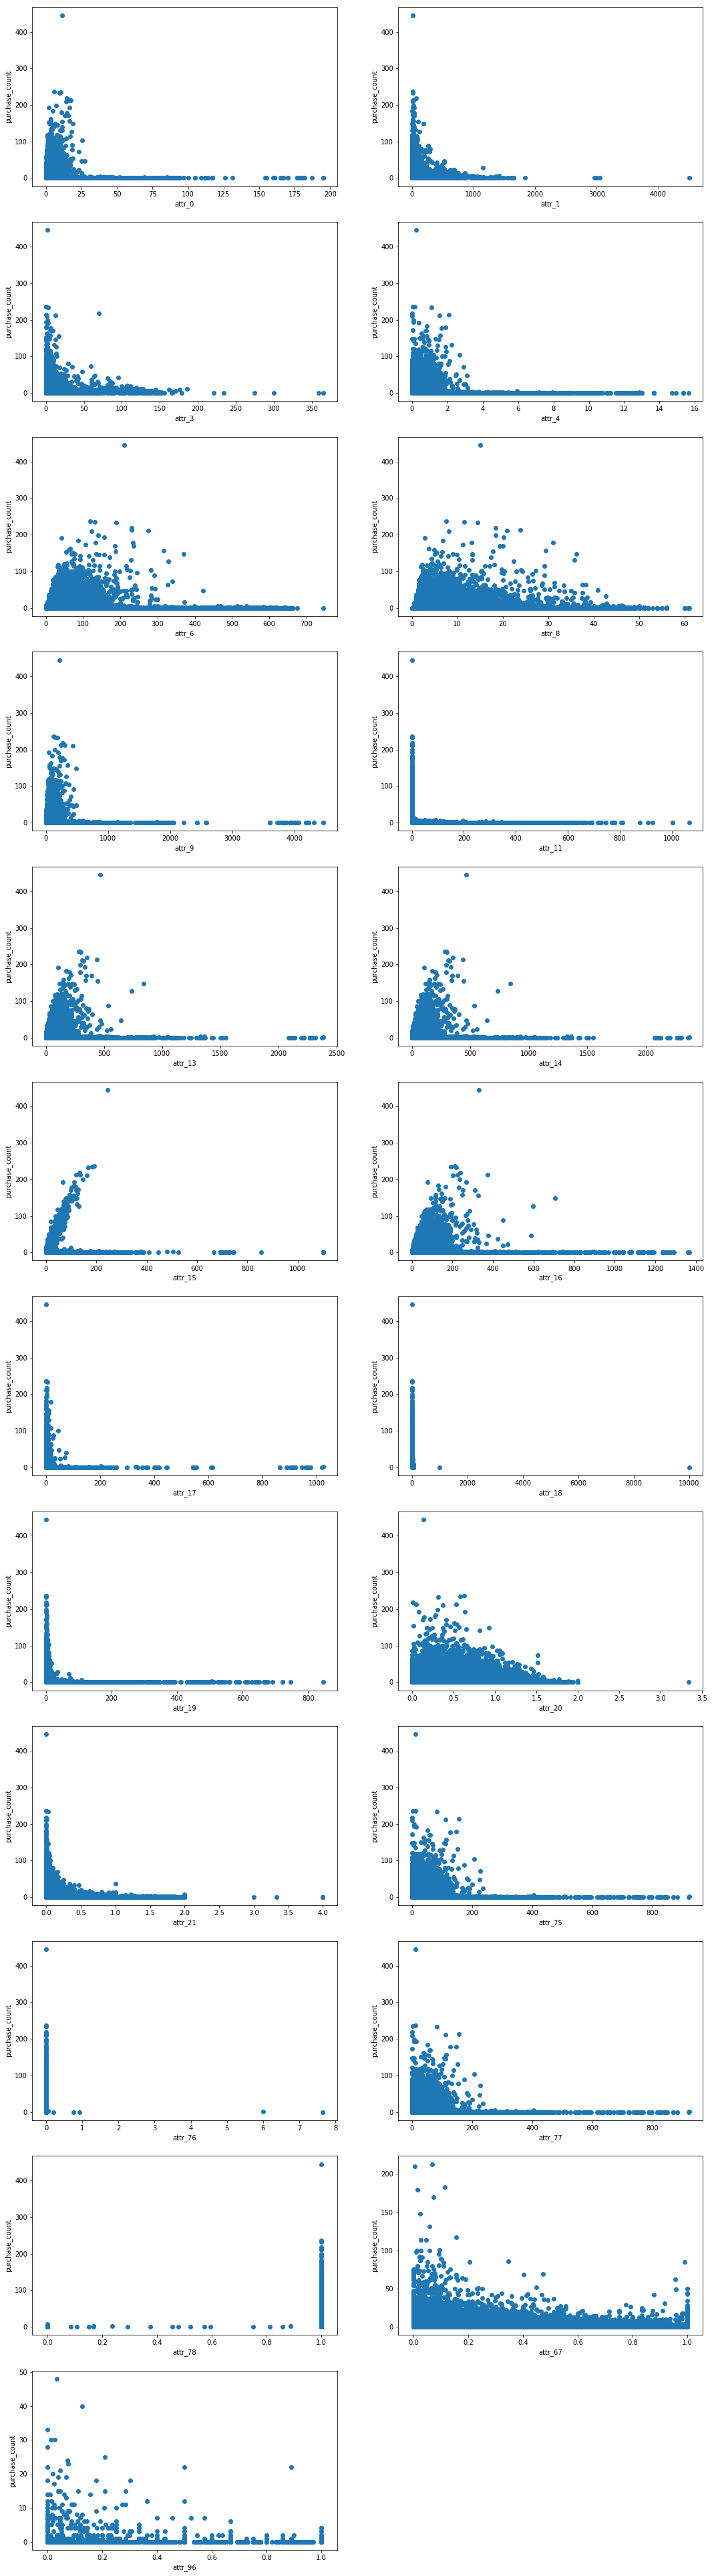

In [115]:
# purchase count

attrs = purchase_attr.attribute.unique()
plt.figure(figsize=(18,70))
for i in range(1, 24):
    attr_id = attrs[i-1]
    plt.subplot(12, 2, i)
    plt.scatter(purchase_attr[purchase_attr['attribute']==attr_id].attribute_value,
                purchase_attr[purchase_attr['attribute']==attr_id].purchase_count)
    plt.xlabel(f'attr_{attr_id}')
    plt.ylabel('purchase_count')

attr 13/14/15/16 might be related

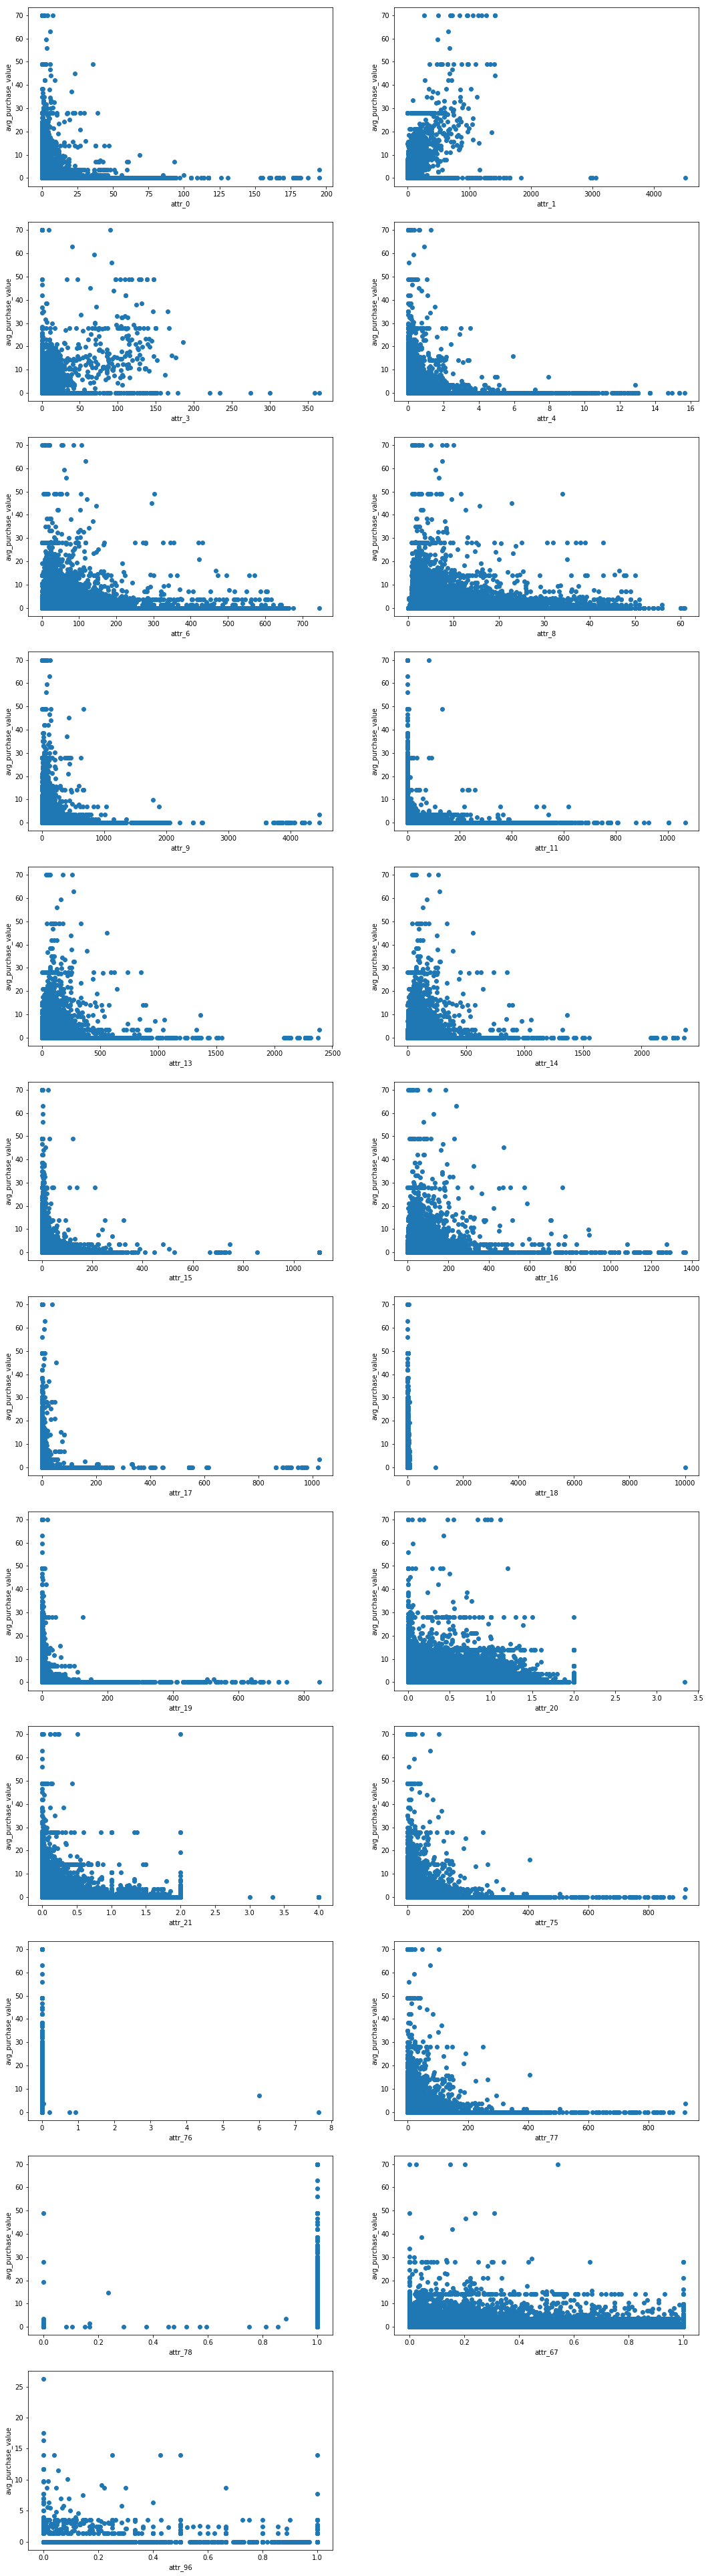

In [116]:
# average purchase value

plt.figure(figsize=(18,70))
for i in range(1, 24):
    attr_id = attrs[i-1]
    plt.subplot(12, 2, i)
    plt.scatter(purchase_attr[purchase_attr['attribute']==attr_id].attribute_value,
                purchase_attr[purchase_attr['attribute']==attr_id].avg_purchase)
    plt.xlabel(f'attr_{attr_id}')
    plt.ylabel('avg_purchase_value')

attr 1/13/14/16 might be related

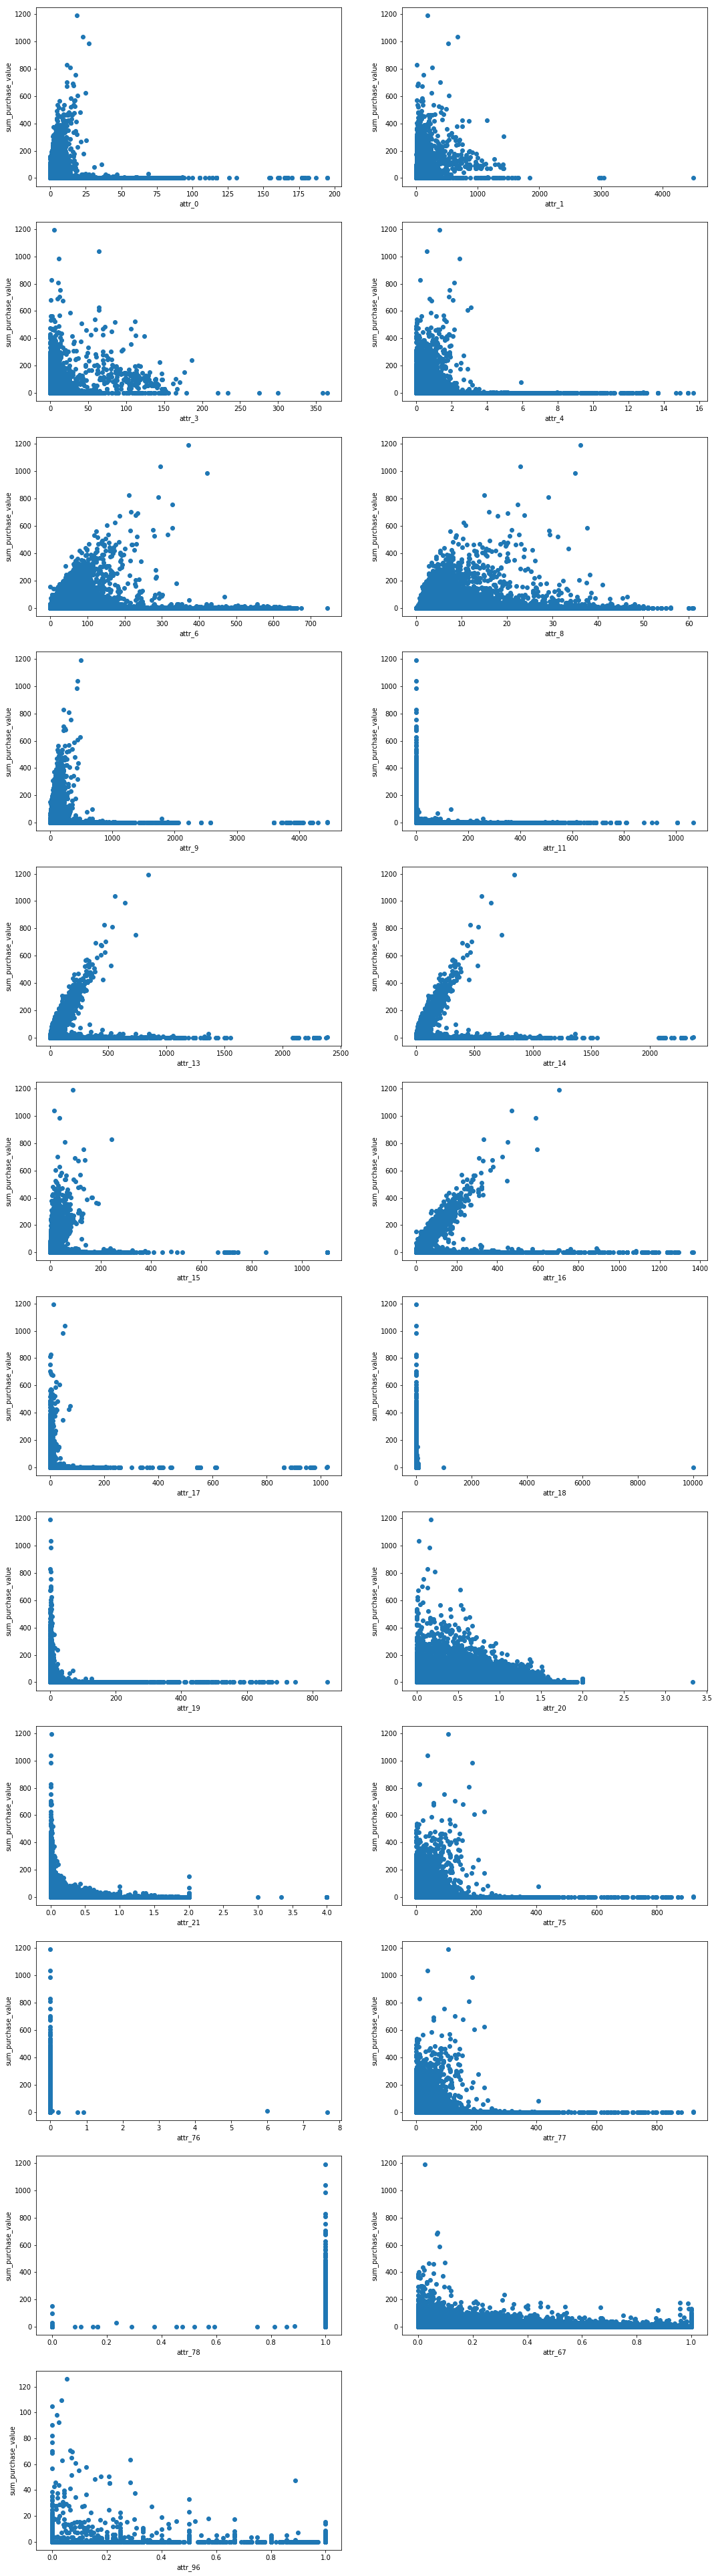

In [117]:
# sum purchase value

plt.figure(figsize=(18,70))
for i in range(1, 24):
    attr_id = attrs[i-1]
    plt.subplot(12, 2, i)
    plt.scatter(purchase_attr[purchase_attr['attribute']==attr_id].attribute_value,
                purchase_attr[purchase_attr['attribute']==attr_id].sum_purchase)
    plt.xlabel(f'attr_{attr_id}')
    plt.ylabel('sum_purchase_value')

attr 13/14/16 might be related

#### In conclusion, attr 1/13/14/15/16 might be related to purchase behavior (frequency, value). We'll try these features.